# Practice Plots
----

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load CSVs for data from 2003-2007
crime0307 = pd.read_csv("Source CSVs/Crime2003-2007.csv")
crime0307 = crime0307.loc[:, ~crime0307.columns.str.contains('^Unnamed')]


In [3]:
#Dropped colums in dataframe
crime_data0307 = crime0307.drop(columns =['Description', 'Longitude', 'Latitude', 'Day', 'Time', 'District',])
crime_data0307.head()

,Incident ID,Category,Year
0,91192460,FORGERY/COUNTERFEITING,2007
1,80000177,WEAPON LAWS,2007
2,80000058,WARRANTS,2007
3,80000111,ASSAULT,2007
4,80000111,OTHER OFFENSES,2007


In [4]:
#Group by category
crimeyears0307_group = crime_data0307.groupby(['Year', 'Category'])
# Count how many times each category appears in our group
crime_data0307_count = crimeyears0307_group['Category'].count()
crime_data0307_count.head()

Year  Category  
2003  ARSON           285
      ASSAULT       12971
      BAD CHECKS      128
      BRIBERY          26
      BURGLARY       5849
Name: Category, dtype: int64

In [5]:
crime_df0307 = pd.DataFrame(crime_data0307_count)
crime_df0307 = crime_df0307.rename(columns= {"Category": "Crime Count"})
crime_df0307 = crime_df0307.reset_index()
crime_df0307.head()

,Year,Category,Crime Count
0,2003,ARSON,285
1,2003,ASSAULT,12971
2,2003,BAD CHECKS,128
3,2003,BRIBERY,26
4,2003,BURGLARY,5849


In [6]:
# violent non violent and property
crimeCategories = []
data = {}
categories = list(crime_df0307["Category"])
crime_count = list(crime_df0307["Crime Count"])
year = list(crime_df0307["Year"])

for index in range(len(categories)):
    # violent crimes
    if(categories[index] == "ARSON" 
       or categories[index] == "RUNAWAY" 
       or categories[index] == "ASSAULT" 
       or categories[index] == "FAMILY OFFENSES"
       or categories[index] == "SEX OFFENSES, FORCIBLE" 
       or categories[index] == 'SUICIDE'
       or categories[index] == 'WEAPON LAWS'
       or categories[index] =="ROBBERY"):
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Violent Crime", "Year": year[index] }
    #Nonviolent crimes
    elif(categories[index] == "BAD CHECKS" 
         or categories[index] == "RUNAWAY"
         or categories[index] =='BRIBERY'
         or categories[index] =='DISORDERLY CONDUCT'
         or categories[index] == 'DRIVING UNDER THE INFLUENCE'
         or categories[index] == 'DRUG/NARCOTIC'
         or categories[index] == 'DRUNKENNESS'
         or categories[index] =='EMBEZZLEMENT'
         or categories[index] =='EXTORTION'
         or categories[index] =='FORGERY/COUNTERFEITING'
         or categories[index] =='FRAUD'
         or categories[index] =='GAMBLING'
         or categories[index] =='KIDNAPPING'
         or categories[index] =='LIQUOR LAWS'
         or categories[index] =='LOITERING'
         or categories[index] =='MISSING PERSON'
         or categories[index] =='NON-CRIMINAL'
         or categories[index] =='OTHER OFFENSES'
         or categories[index] =='PORNOGRAPHY/OBSCENE MAT'
         or categories[index] =='PROSTITUTION'
         or categories[index] =='RECOVERED VEHICLE'
         or categories[index] =='SECONDARY CODES'
         or categories[index] =='SEX OFFENSES, NON FORCIBLE'
         or categories[index] =='SUSPICIOUS OCC'
         or categories[index] =='TRESPASS'
         or categories[index] =='VANDALISM'
         or categories[index] =='WARRANTS'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Non Violent Crime", "Year": year[index]  }
    #Property Theift
    elif(categories[index] =="BURGLARY" 
         or categories[index] =='LARCENY/THEFT'
         or categories[index] =='STOLEN PROPERTY'
         or categories[index] =='VEHICLE THEFT'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Property Theft", "Year": year[index] }
    else:
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": None, "Year": year[index] }
        
    crimeCategories.append(data) 

crime_df = pd.DataFrame(crimeCategories)

In [7]:
crimeGroup_df = crime_df.groupby(['Crime Category', 'Year']).first()
crimeGroup_df.head()

Category  Crime Count
Crime Category    Year                         
Non Violent Crime 2003  BAD CHECKS          128
                  2004  BAD CHECKS           79
                  2005  BAD CHECKS          101
                  2006  BAD CHECKS           87
                  2007  BAD CHECKS           69

In [8]:
crimeGroup_df = crimeGroup_df.reset_index()
crimeGroup_df.head()

,Crime Category,Year,Category,Crime Count
0,Non Violent Crime,2003,BAD CHECKS,128
1,Non Violent Crime,2004,BAD CHECKS,79
2,Non Violent Crime,2005,BAD CHECKS,101
3,Non Violent Crime,2006,BAD CHECKS,87
4,Non Violent Crime,2007,BAD CHECKS,69


In [9]:
mungeCrime_df = crimeGroup_df.pivot(index ='Year', columns ='Crime Category', values=['Crime Count'])
mungeCrime_df

Crime Count                             
Crime Category Non Violent Crime Property Theft Violent Crime
Year                                                         
2003                         128           5849           285
2004                          79           6753           280
2005                         101           7071           231
2006                          87           7004           240
2007                          69           5454           246

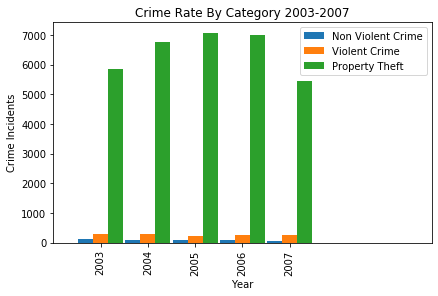

In [10]:
mungeCrime_df['Crime Count'][["Non Violent Crime", "Violent Crime", "Property Theft"]].plot(kind='bar', width=.95)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7)
plt.title("Crime Rate By Category 2003-2007")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/CrimeCategory2003-2007.png")